In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [2]:
# ONLY USE CPU FOR TRAINING
# THIS IS A TEMPORARY FIX, SINCE GPU TRAINING IS GIVING ERRORS
# RUN THIS BEFORE IMPORTING TENSORFLOW
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import tensorflow as tf
print(tf.__version__)

2025-05-28 09:46:16.885665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748414776.900124   17635 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748414776.904080   17635 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748414776.913884   17635 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748414776.913899   17635 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748414776.913900   17635 computation_placer.cc:177] computation placer alr

2.19.0


In [4]:


# FD001 verisini oku
train = pd.read_csv(os.path.join("CMaps", "train_FD001.txt"), sep=" ", header=None)
train.drop(columns=[26, 27], inplace=True)  # Boş sütunları at
train.columns = ['unit', 'time'] + [f'op{i}' for i in range(1,4)] + [f'sensor{i}' for i in range(1,22)]

# Her motor için RUL hesapla
rul = train.groupby('unit')['time'].max().reset_index()
rul.columns = ['unit', 'max_time']
train = train.merge(rul, on='unit')
train['RUL'] = train['max_time'] - train['time']
train.drop('max_time', axis=1, inplace=True)

# Sensör seçimi (örnek)
sensor_cols = ['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21']

# Normalizasyon
scaler = MinMaxScaler()
train[sensor_cols] = scaler.fit_transform(train[sensor_cols])

train.head()


,unit,time,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,0.183735,0.406802,0.309757,14.62,...,0.205882,8138.62,0.363986,0.03,0.333333,2388,100.0,0.713178,0.724662,191
1,1,2,0.0019,-0.0003,100.0,518.67,0.283133,0.453019,0.352633,14.62,...,0.279412,8131.49,0.411312,0.03,0.333333,2388,100.0,0.666667,0.731014,190
2,1,3,-0.0043,0.0003,100.0,518.67,0.343373,0.369523,0.370527,14.62,...,0.220588,8133.23,0.357445,0.03,0.166667,2388,100.0,0.627907,0.621375,189
3,1,4,0.0007,0.0000,100.0,518.67,0.343373,0.256159,0.331195,14.62,...,0.294118,8133.83,0.166603,0.03,0.333333,2388,100.0,0.573643,0.662386,188
4,1,5,-0.0019,-0.0002,100.0,518.67,0.349398,0.257467,0.404625,14.62,...,0.235294,8133.80,0.402078,0.03,0.416667,2388,100.0,0.589147,0.704502,187


In [5]:

file_path = os.path.join("CMaps", "train_FD001.txt")  # Kendi dizinine göre güncelle

columns = ['unit', 'time'] + [f'op{i}' for i in range(1, 4)] + [f'sensor{i}' for i in range(1, 22)]


df = pd.read_csv(file_path, sep=r'\s+', header=None, names=columns)


# Max time for each motor
rul_max = df.groupby('unit')['time'].max().reset_index()
rul_max.columns = ['unit', 'max_time']
df = df.merge(rul_max, on='unit')
df['RUL'] = df['max_time'] - df['time']
df.drop(columns='max_time', inplace=True)

# Kullanılacak sensörleri seç (örnek olarak informative sensörler)
sensor_cols = ['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8',
               'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor15',
               'sensor17', 'sensor20', 'sensor21']

# Normalize
scaler = MinMaxScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])


print(df.head())

   unit  time     op1     op2    op3  sensor1   sensor2   sensor3   sensor4  \
0     1     1 -0.0007 -0.0004  100.0   518.67  0.183735  0.406802  0.309757   
1     1     2  0.0019 -0.0003  100.0   518.67  0.283133  0.453019  0.352633   
2     1     3 -0.0043  0.0003  100.0   518.67  0.343373  0.369523  0.370527   
3     1     4  0.0007  0.0000  100.0   518.67  0.343373  0.256159  0.331195   
4     1     5 -0.0019 -0.0002  100.0   518.67  0.349398  0.257467  0.404625   

   sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  \
0    14.62  ...  0.205882   8138.62  0.363986      0.03  0.333333      2388   
1    14.62  ...  0.279412   8131.49  0.411312      0.03  0.333333      2388   
2    14.62  ...  0.220588   8133.23  0.357445      0.03  0.166667      2388   
3    14.62  ...  0.294118   8133.83  0.166603      0.03  0.333333      2388   
4    14.62  ...  0.235294   8133.80  0.402078      0.03  0.416667      2388   

   sensor19  sensor20  sensor21  RUL  
0     100.0

In [6]:
sequence_length = 30
features = df[sensor_cols + ['unit', 'RUL']]

X, y = [], []

# Produce windows
for unit in features['unit'].unique():
    unit_df = features[features['unit'] == unit]
    unit_data = unit_df[sensor_cols].values
    unit_rul = unit_df['RUL'].values
    
    for i in range(len(unit_data) - sequence_length + 1):
        X.append(unit_data[i:i+sequence_length])
        y.append(unit_rul[i + sequence_length - 1])  # pencerenin sonundaki RUL

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (17731, 30, 13), y shape: (17731,)


In [7]:


# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")


Train shape: (14184, 30, 13), Validation shape: (3547, 30, 13)


In [8]:
# LSTM model definition
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

model.summary()


2025-05-28 09:46:34.141204: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-28 09:46:34.141235: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-05-28 09:46:34.141242: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-05-28 09:46:34.141247: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-28 09:46:34.141251: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: kerdogan-ABRA-A5-V15-5
2025-05-28 09:46:34.141254: I external/local_xla/xla/stream_exec

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Callbacks 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TRAIN
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 88.2131 - mae: 88.2131 - val_loss: 80.7524 - val_mae: 80.7524
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 79.8532 - mae: 79.8532 - val_loss: 75.2290 - val_mae: 75.2290
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 75.8972 - mae: 75.8972 - val_loss: 70.5500 - val_mae: 70.5500
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 69.6363 - mae: 69.6363 - val_loss: 66.5288 - val_mae: 66.5288
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 66.5171 - mae: 66.5171 - val_loss: 63.1536 - val_mae: 63.1536
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 63.0826 - mae: 63.0826 - val_loss: 60.3103 - val_mae: 60.3103
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 60.8057 - mae: 60.8057 - val_loss: 57.9459 - val_mae: 57.9459
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 58.5535 - mae: 58.5535 - val_loss: 56.0203 - val_mae: 56.0203
Epoch 9/50
222/2

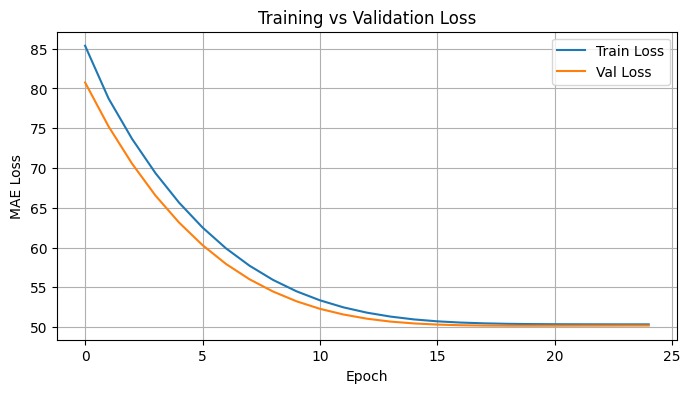

In [10]:
# Loss grafiklerini çiz
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
#Attack 
#Step 1: Load and Preprocess test_FD001.txt
test_path = os.path.join("CMaps", "test_FD001.txt")

test_df = pd.read_csv(test_path, sep=r"\s+", header=None)
test_df = test_df.loc[:, test_df.columns.difference([26, 27])]      # drop empty columns if they exist
test_df.columns = ['unit', 'time'] + [f'op{i}' for i in range(1, 4)] + [f'sensor{i}' for i in range(1, 22)]

# RUL not given in test file; optionally create dummy values or skip
# Apply the same scaling used on training
test_df[sensor_cols] = scaler.transform(test_df[sensor_cols])

In [15]:
#Step 2: Convert Test Data to LSTM Input Format
sequence_length = 30
X_test = []

for unit in test_df['unit'].unique():
    unit_df = test_df[test_df['unit'] == unit]
    unit_data = unit_df[sensor_cols].values
    for i in range(len(unit_data) - sequence_length + 1):
        X_test.append(unit_data[i:i+sequence_length])

X_test = np.array(X_test)

In [18]:
#Step 3: FGSM Attack Function (White-box)
def fgsm_attack(model, X, epsilon):
    X_adv = tf.convert_to_tensor(X, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(X_adv)
        prediction = model(X_adv)
        loss = tf.reduce_mean(tf.abs(prediction))

    gradient = tape.gradient(loss, X_adv)
    signed_grad = tf.sign(gradient)
    X_perturbed = X_adv + epsilon * signed_grad
    return X_perturbed.numpy()

In [19]:
#Step 4: Apply FGSM to a Subset of Test Data
epsilon = 0.05
X_adv = fgsm_attack(model, X_test[:100], epsilon)  # test only on first 100 for speed

# Predict and compare
y_pred_orig = model.predict(X_test[:100])
y_pred_adv = model.predict(X_adv)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


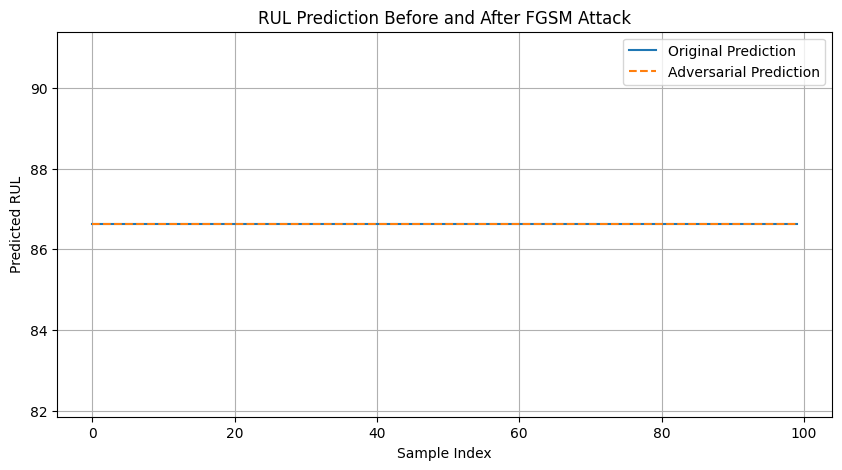

In [20]:
#Step 5: Visualize Perturbation Impact
plt.figure(figsize=(10, 5))
plt.plot(y_pred_orig, label='Original Prediction')
plt.plot(y_pred_adv, label='Adversarial Prediction', linestyle='--')
plt.title("RUL Prediction Before and After FGSM Attack")
plt.xlabel("Sample Index")
plt.ylabel("Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Step 6: Measure Perturbation Strength (Lp Norm)
from numpy.linalg import norm

l2_norms = [norm((x_adv - x_orig).flatten(), ord=2) for x_adv, x_orig in zip(X_adv, X_test[:100])]
print("Avg L2 perturbation:", np.mean(l2_norms))

Avg L2 perturbation: 0.9874210710907658
